<a href="https://colab.research.google.com/github/deniztahmouresi/interviewTask/blob/develop/InterviewTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Exploration & Exploratory Data Analysis (EDA):

*   Dimension exploration
*   Sample visualization
*   Distribution visualoization
*   Data range exploration  






In [106]:
#Data Understanding & Exploratory Data Analysis (EDA)
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import random
drive.mount('/content/drive')
#Load data
dataset = np.load('/content/drive/MyDrive/Colab Notebooks/interviewTask/data.npz')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


X_train shape:
(67160, 28, 28)
Y_train shape:
(67160,)
X_test shape:
(10000, 28, 28)
y_test shape:
(10000,)
X_train samples: 


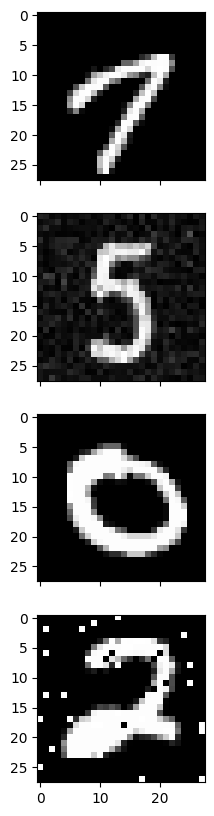

X_test samples: 


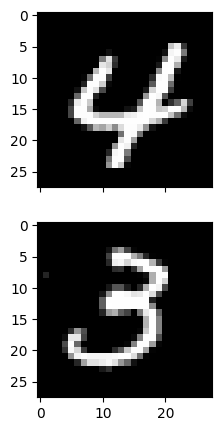

In [107]:
#Explore dimension of data
print("X_train shape:")
print(dataset['X_train'].shape)
print("Y_train shape:")
print (dataset['y_train'].shape)
print("X_test shape:")
print (dataset['X_test'].shape)
print("y_test shape:")
print (dataset['y_test'].shape)
# Visualize a few samples from 'X_train' and 'X_test' to capture a sense on what the data look like
random_samples = []
for i in range(4):
  sample_index = random.randint(0, 67609)
  random_samples.append(sample_index)
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,10))
i = 0
print("X_train samples: ")
for sample in random_samples:
  sample_image = dataset['X_train'][sample]
  ax[i].imshow(sample_image, cmap=plt.get_cmap("gray"))
  i += 1
plt.show()

random_samples = []
for i in range(2):
  sample_index = random.randint(0, 9999)
  random_samples.append(sample_index)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(3,5))
i = 0
print("X_test samples: ")
for sample in random_samples:
  sample_image = dataset['X_test'][sample]
  ax[i].imshow(sample_image, cmap=plt.get_cmap("gray"))
  i += 1
plt.show()

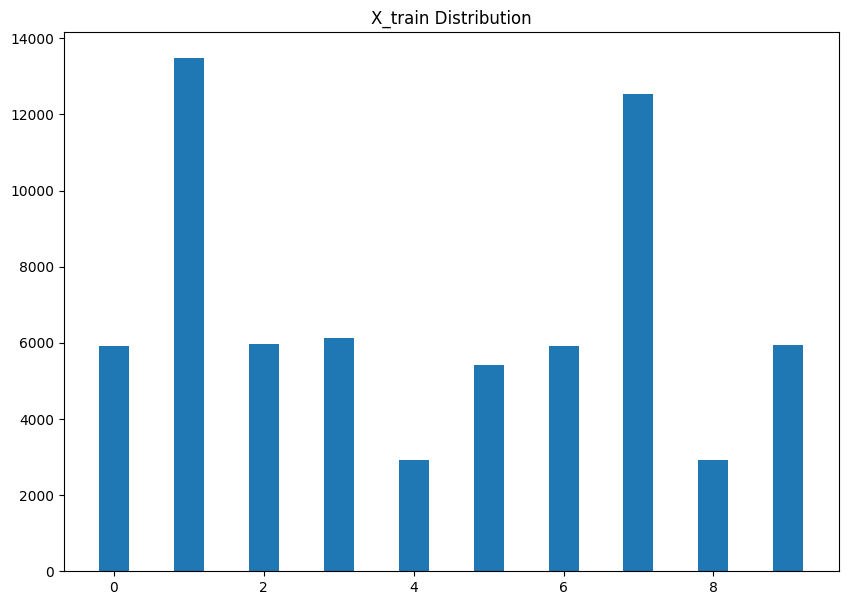

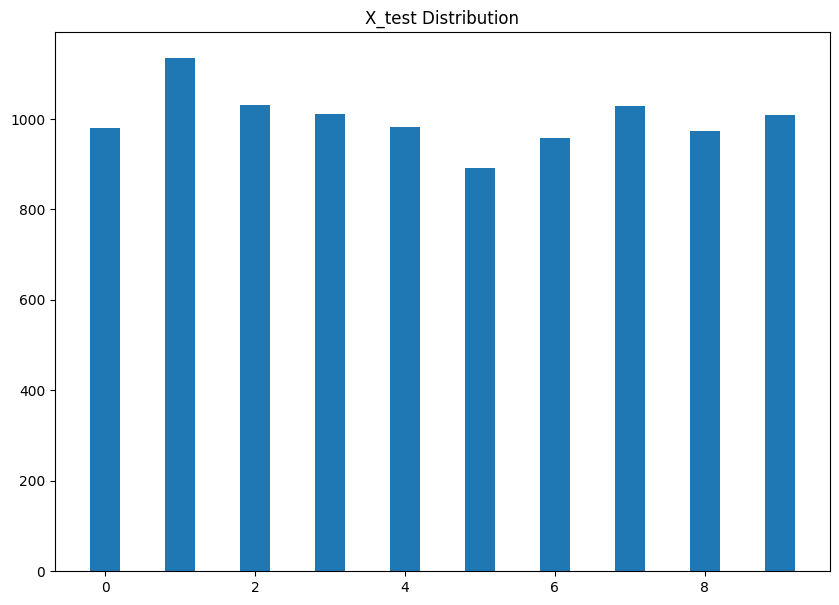

In [108]:
# Visualize the distribution of classes in 'X_train' and 'X_test'
class_labels_train = np.unique(dataset['y_train'])
count_train = np.zeros((10,), dtype=int)
for cat in dataset['y_train']:
    cat = int(cat)
    count_train[cat]+=1
fig = plt.figure(figsize=(10, 7))
plt.bar(class_labels_train, count_train, width = 0.4)
plt.title("X_train Distribution")
plt.show()
print("\n\n")
class_labels_test = np.unique(dataset['y_test'])
count_test = np.zeros((10,), dtype=int)
for cat in dataset['y_test']:
    cat = int(cat)
    count_test[cat]+=1
fig = plt.figure(figsize=(10, 7))
plt.bar(class_labels_test, count_test, width = 0.4)
plt.title("X_test Distribution")
plt.show()

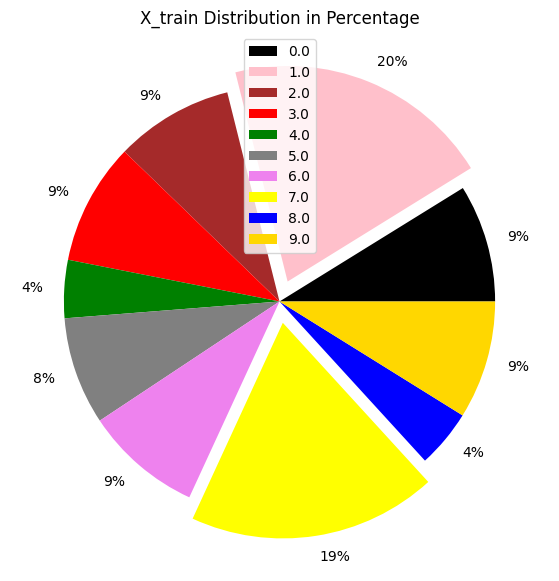

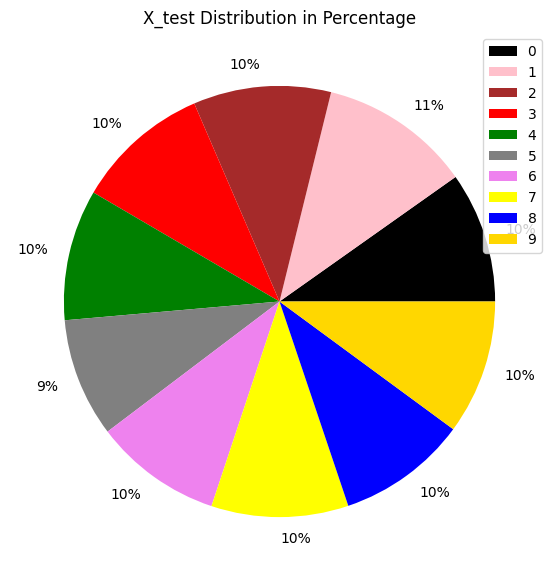

In [109]:
# Visualize the distribution of classes in 'X_train' and 'X_test' in percentages
fig = plt.figure(figsize=(10, 7))
myExplode = [0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0]
percentages = [100.0 * x / sum(count_train) for x in count_train]
fmt_str = "{:.0f}%"
percentages = [fmt_str.format(p) for p in percentages]
colors = ['black', 'pink', 'brown', 'red', 'green', 'gray', 'violet', 'yellow', 'blue', 'gold']
plt.pie(count_train, labels = percentages, explode = myExplode, colors=colors)
class_labels = [int(label) for label in class_labels_train]
plt.legend(class_labels_train)
plt.title("X_train Distribution in Percentage")
plt.show()
print("\n\n")
fig = plt.figure(figsize=(10, 7))
percentages = [100.0 * x / sum(count_test) for x in count_test]
fmt_str = "{:.0f}%"
percentages = [fmt_str.format(p) for p in percentages]
colors = ['black', 'pink', 'brown', 'red', 'green', 'gray', 'violet', 'yellow', 'blue', 'gold']
plt.pie(count_test, labels = percentages, colors=colors)
class_labels = [int(label) for label in class_labels_test]
plt.legend(class_labels_test)
plt.title("X_test Distribution in Percentage")
plt.show()

In [110]:
#Explore the range of values
print("Maximum value of X_trian Matrices:")
print(dataset['X_train'].max())
print("Minimum value of X_trian Matrices:")
print(dataset['X_train'].min())
print("Maximum value of X_test Matrices:")
print(dataset['X_test'].max())
print("Minimum value of X_test Matrices:")
print(dataset['X_test'].min())

Maximum value of X_trian Matrices:
255.0
Minimum value of X_trian Matrices:
0.0
Maximum value of X_test Matrices:
255
Minimum value of X_test Matrices:
0


2.1 Data Preprocessing

1.   Data normalization
2.   Data reshaping





In [111]:
from tensorflow import keras

#Seprate data
x_train = dataset['X_train']
y_train = dataset['y_train']
x_test = dataset['X_test']
y_test = dataset['y_test']
#Normalize data to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
#Do one hot encode on category values
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

3. Model Building: CNN


In [113]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

#Define cnn model
def cnn_model():
  model = keras.Sequential(
      [
          keras.Input(shape=(28, 28, 1)),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(100, activation="relu", kernel_initializer='he_uniform'),
          layers.Dense(10, activation="softmax"),
      ]
  )
  model.summary()
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss="categorical_crossentropy", optimizer=opt, weighted_metrics=["categorical_accuracy", ])
  return model


4.1 Model Evaluation & Visualization:


1.   Training accuracy & loss curves
2.   Confusion matrix
3.   Loss and accuracy
4.   Precision
5.   Recall
6.   F1-score




In [114]:
from sklearn.utils.class_weight import compute_class_weight

#Define class weights
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(dataset['y_train']), y = dataset['y_train'])
class_weights = [round(w, 2) for w in class_weights]
class_weights = dict(enumerate(class_weights))
#Train model on data
batch_size = 128
epochs = 15
model = cnn_model()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, class_weight=class_weights)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 100)              

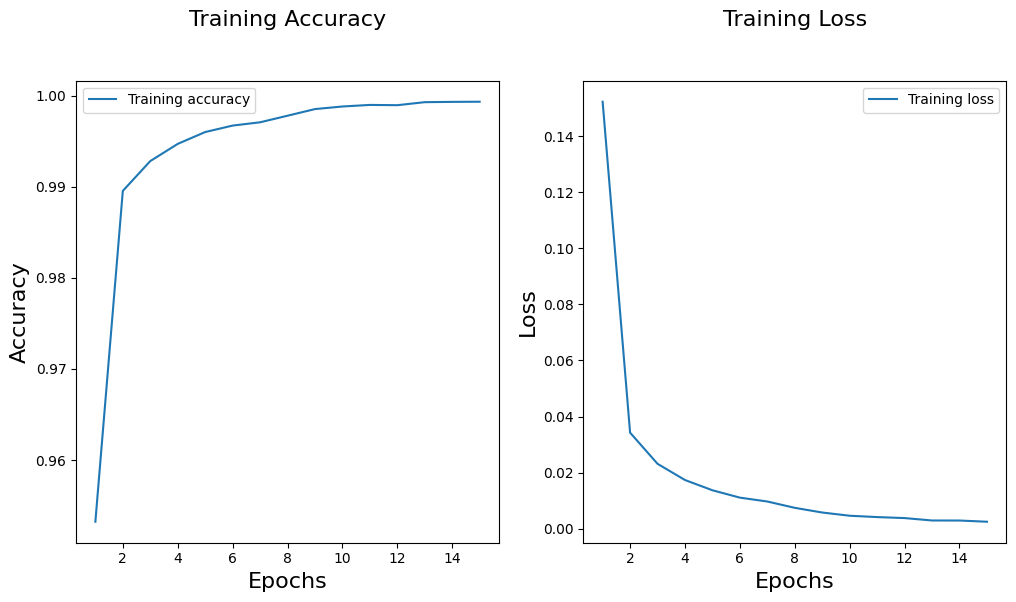

In [115]:
#define loss and accuracy plot function
def plot_loss_acc(history):
  # Plot the model accuracy and loss vs epochs
  history_dict = history.history
  loss_values = history_dict['loss']
  accuracy = history_dict['categorical_accuracy']
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # Plot the model accuracy vs epochs
  ax[0].plot(epochs, accuracy, label='Training accuracy')
  ax[0].set_title('Training Accuracy\n\n', fontsize=16)
  ax[0].set_xlabel('Epochs', fontsize=16)
  ax[0].set_ylabel('Accuracy', fontsize=16)
  ax[0].legend()
  # Plot the loss vs Epochs
  ax[1].plot(epochs, loss_values, label='Training loss')
  ax[1].set_title('Training Loss\n\n', fontsize=16)
  ax[1].set_xlabel('Epochs', fontsize=16)
  ax[1].set_ylabel('Loss', fontsize=16)
  ax[1].legend()
plot_loss_acc(history)

Confusion matrix for CNN with weighted class



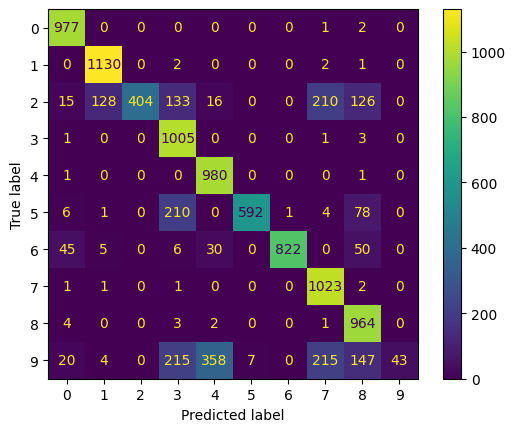

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Confusion matrix for CNN with weighted class\n")
#Define confusion matrix plot function
def plot_confusion_matrix(x_test, y_test):
  y_pred = model.predict(x_test, verbose=0)
  matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=class_labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_labels)
  disp.plot()
  plt.show()
#Plot confusion matrix
plot_confusion_matrix(x_test, y_test)

In [118]:
from sklearn.metrics import classification_report

#Define metrics report function
def evaluate_model(x_test, y_test, title):
  y_pred = model.predict(x_test, verbose=0)
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Report metrics for CNN " + title)
  print("Test loss:", score[0])
  print()
  print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
evaluate_model(x_test, y_test, "with weighted class")

Report metrics for CNN with weighted class
Test loss: 1.0126521587371826

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       980
           1       0.89      1.00      0.94      1135
           2       1.00      0.39      0.56      1032
           3       0.64      1.00      0.78      1010
           4       0.71      1.00      0.83       982
           5       0.99      0.66      0.79       892
           6       1.00      0.86      0.92       958
           7       0.70      1.00      0.82      1028
           8       0.70      0.99      0.82       974
           9       1.00      0.04      0.08      1009

    accuracy                           0.79     10000
   macro avg       0.85      0.79      0.75     10000
weighted avg       0.85      0.79      0.75     10000



2.2 Data Preprocessing

1.   Noise filtering
1.   Data normalization
2.   Data reshaping




In [119]:
from scipy import signal

#Seprate data
x_train = dataset['X_train']
y_train = dataset['y_train']
x_test = dataset['X_test']
y_test = dataset['y_test']
#Filter noise of salt and pepper by median filter
X_train = np.ndarray(shape=(len(x_train),28, 28) , dtype=int)
i = 0
for img in x_train:
  X_train[i] = signal.medfilt2d(img)
  i += 1
X_test = np.ndarray(shape=(len(x_test),28, 28) , dtype=int)
i = 0
for img in x_test:
  X_test[i] = signal.medfilt2d(img)
  i += 1
#Normalize data to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
#Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
#Do one hot encode on category values
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

4.2 Model Evaluation & Visualization:

1.   Training accuracy & loss curves
2.   Confusion matrix
3.   Loss and accuracy
4.   Precision
5.   Recall
6.   F1-score

In [120]:
#Train model on data
batch_size = 128
epochs = 15
model = cnn_model()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, class_weight=class_weights)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 100)             

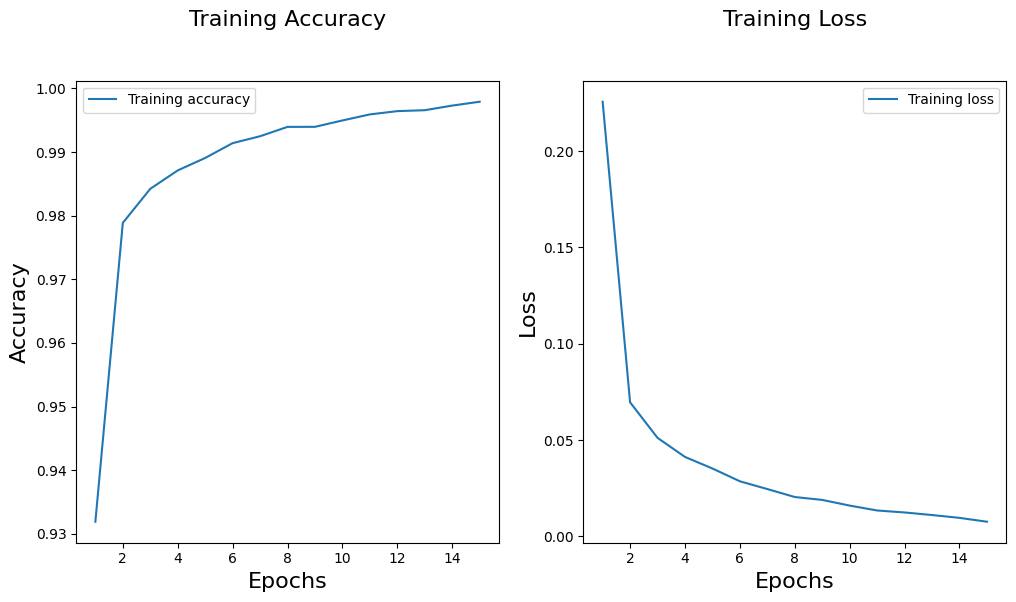

In [121]:
plot_loss_acc(history)

Confusion matrix for CNN with weighted class and noise filter



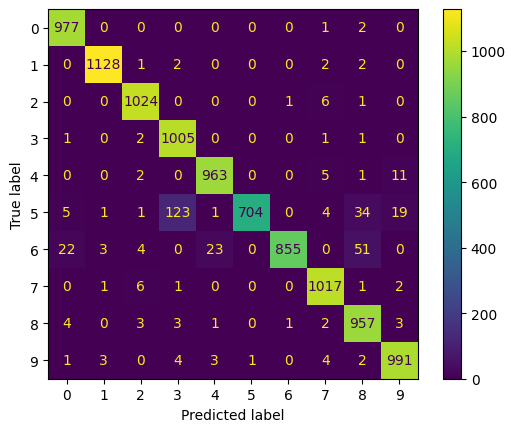

In [122]:
print("Confusion matrix for CNN with weighted class and noise filter\n")
#Plot confusion matrix
plot_confusion_matrix(X_test, y_test)

In [123]:
evaluate_model(X_test, y_test, "with weighted class and noise filter")

Report metrics for CNN with weighted class and noise filter
Test loss: 0.1363372802734375

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.88      1.00      0.94      1010
           4       0.97      0.98      0.98       982
           5       1.00      0.79      0.88       892
           6       1.00      0.89      0.94       958
           7       0.98      0.99      0.98      1028
           8       0.91      0.98      0.94       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

